In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [10]:

import os.path as osp
shared_folder = osp.abspath(osp.join('..', '..', 'share'))
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join('..', 'data')),
    saves_folder_path=osp.abspath(osp.join('..', 'saves'))
)

# Import needed libraries
from PIL import Image, ImageSequence
from os import listdir as listdir, makedirs as makedirs
import imageio

In [5]:

[fn for fn in dir(nu) if fn.endswith('_folder')]

['anaconda_folder', 'bin_folder', 'cache_folder', 'data_csv_folder', 'data_folder', 'data_models_folder', 'db_folder', 'github_folder', 'graphs_folder', 'indices_folder', 'list_dfs_in_folder', 'saves_csv_folder', 'saves_folder', 'saves_mp3_folder', 'saves_pickle_folder', 'saves_text_folder', 'saves_wav_folder', 'scripts_folder', 'txt_folder']

In [11]:

gif_folder = osp.join(nu.saves_folder, 'gif')
makedirs(name=gif_folder, exist_ok=True)
file_path = osp.join(gif_folder, 'youtube-video-gif.gif')
gif = Image.open(file_path)
frames = [frame.copy() for frame in ImageSequence.Iterator(gif)]

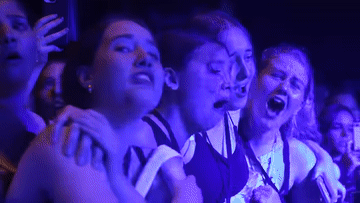

In [22]:

from IPython.display import Image

cut_frames = frames[118:]
file_name = 'whole_damn_life.gif'
file_path = osp.join(gif_folder, file_name)
imageio.mimsave(file_path, cut_frames, fps=20)
display(Image(filename=file_path))

In [18]:

import ipywidgets as widgets
from PIL import Image
from io import BytesIO

# Assuming 'cut_frames' is a list of PIL Image objects
frame_slider = widgets.IntSlider(min=0, max=len(cut_frames)-1, value=0)
image_widget = widgets.Image()  # Initialize without a value

def update_image(change):
    img_bytes = BytesIO()
    cut_frames[change['new']].save(img_bytes, format='PNG')  # Convert to bytes-like object
    img_bytes.seek(0)  # Rewind to beginning
    image_widget.value = img_bytes.read()  # Assign bytes to widget

frame_slider.observe(update_image, names='value')
display(widgets.HBox([frame_slider, image_widget]))